# Supervised learning - Python - Univariate linear regression

## Simple linear regression or univariate (one variable) linear regression

In [1]:
%%latex
$
y = b_0 + b_1 * x_1 \\
y \text{ is the dependent variable} \\
b_0 \text{ is the y-intercept} \\
b_1 \text{ is the coefficient for the independent variable, the slope} \\
x_1 \text{ is the independent variable}
$

<IPython.core.display.Latex object>

### Evaluate the accuracy of the prediction : Ordinary Least Squares

In [2]:
%%latex
The best fitting line is the one that gets the smaller Ordinary Least Squares

$$\sum_{i=0}^{m} (y_i - \hat{y_i})^2 \\$$

$
m \text{ is the number of training examples} \\
\hat{y_i} \text{ is the }i^{th} \text{ prediction} \\
y_i \text{ is the }i^{th} \text{ dependent variable} \\
$

<IPython.core.display.Latex object>

## Import dataset

In [3]:
import pandas as pd

dataset = pd.read_csv('salary_data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
x = dataset.iloc[:, :-1].values
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [5]:
y = dataset.iloc[:, 1].values
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

## Handle missing data, categorize data, apply feature scaling if applicable

## Split the data into training set (60%), cross validation set (20%), test set (20%)

In [6]:
from sklearn.model_selection import train_test_split
X_tmp, X_test, y_tmp, y_test = train_test_split(x, y, test_size=0.2)
X_train, X_cv, y_train, y_cv = train_test_split(X_tmp, y_tmp, test_size=0.25)

print('X_train:')
print(X_train)

print('y_train:')
print(y_train)

print('\nX_cv:')
print(X_cv)

print('y_cv')
print(y_cv)

print('\nX_test:')
print(X_test)

print('y_test:')
print(y_test)

X_train:
[[ 1.1]
 [ 9.5]
 [ 9.6]
 [ 4.1]
 [ 7.9]
 [ 4.5]
 [ 2.2]
 [ 1.3]
 [ 3.9]
 [10.3]
 [ 5.1]
 [ 4. ]
 [ 3.2]
 [ 3.2]
 [ 8.2]
 [ 3. ]
 [10.5]
 [ 5.9]]
y_train:
[ 39343. 116969. 112635.  57081. 101302.  61111.  39891.  46205.  63218.
 122391.  66029.  56957.  54445.  64445. 113812.  60150. 121872.  81363.]

X_cv:
[[3.7]
 [4.9]
 [9. ]
 [7.1]
 [4. ]
 [6. ]]
y_cv
[ 57189.  67938. 105582.  98273.  55794.  93940.]

X_test:
[[5.3]
 [2. ]
 [1.5]
 [6.8]
 [8.7]
 [2.9]]
y_test:
[ 83088.  43525.  37731.  91738. 109431.  56642.]


## Create and train model

In [7]:
from sklearn.linear_model import LinearRegression

# train model
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# the cross validation set is used to validate the best performing approach
y_cv_pred = linear_regression.predict(X_cv)
# do some adjustments before evaluating the test set

# the test set is used to estimated the accuracy of the selected approach, we want to do that on unseen data
y_test_pred = linear_regression.predict(X_test)

## Plot the predictions of the model

### Plot training, cross validation, test set
Red dots are real values from the data.
Blue line is the prediction.


Text(0,0.5,'Salary')

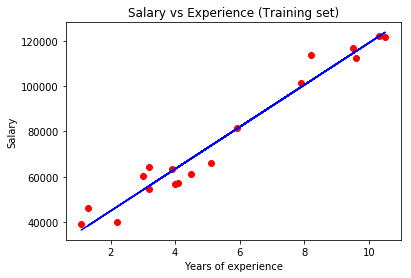

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt_train

plt_train.scatter(X_train, y_train, color='red')

# we want the prediction of the training set and not the test set
plt_train.plot(X_train, linear_regression.predict(X_train), color='blue')

plt_train.title('Salary vs Experience (Training set)')
plt_train.xlabel('Years of experience')
plt_train.ylabel('Salary')

### Plot cross validation set

Text(0,0.5,'Salary')

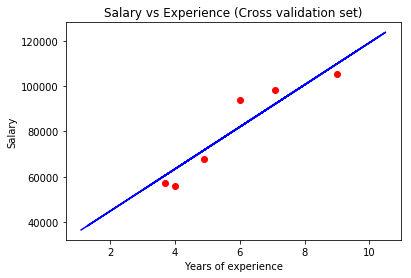

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt_cv

plt_cv.scatter(X_cv, y_cv, color='red')

# we must reuse the unique linear regression we created with the training set, we do not want to create another one
# with the cross validation set nor the test set
plt_train.plot(X_train, linear_regression.predict(X_train), color='blue')
plt_cv.title('Salary vs Experience (Cross validation set)')
plt_cv.xlabel('Years of experience')
plt_cv.ylabel('Salary')

### Plot test set

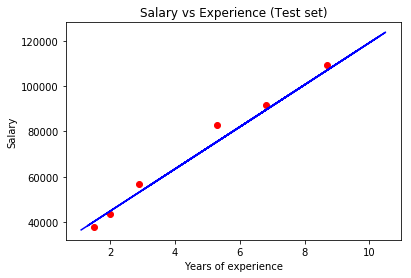

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt_test

plt_test.scatter(X_test, y_test, color='red')
plt_train.plot(X_train, linear_regression.predict(X_train), color='blue')
plt_test.title('Salary vs Experience (Test set)')
plt_test.xlabel('Years of experience')
plt_test.ylabel('Salary')
plt_test.show()